<a href="https://colab.research.google.com/github/abirhazra/Reinforcement-Learning/blob/main/DDPG_agent(Actor_Critic)_with_Keras_RL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.14
!pip install keras-rl2
# !pip install tensorflow==2.3.0
# !pip install gym
# !pip install keras
# !pip install keras-rl2

  Using cached https://files.pythonhosted.org/packages/f4/28/96efba1a516cdacc2e2d6d081f699c001d414cc8ca3250e6d59ae657eb2b/tensorflow-1.14.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3c/d5/21860a5b11caf0678fbc8319341b0ae21a07156911132e0e71bffed0510d/tensorflow_estimator-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
ERROR: keras-rl2 1.0.4 has requirement tensorflow>=2.1.0, but you'll have tensorflow 1.14.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
     

  Using cached https://files.pythonhosted.org/packages/70/dc/e8c5e7983866fa4ef3fd619faa35f660b95b01a2ab62b3884f038ccab542/tensorflow-2.4.1-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/64/21/eebd23060763fedeefb78bc2b286e00fa1d8abda6f70efa2ee08c28af0d4/tensorboard-2.4.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/74/7e/622d9849abf3afb81e482ffc170758742e392ee129ce1540611199a59237/tensorflow_estimator-2.4.0-py2.py3-none-any.whl
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [ ]:
import numpy as np
import gym

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Input, Concatenate
from keras.optimizers import Adam, Adadelta, Adagrad, Adamax, SGD, RMSprop

from rl.agents import  DDPGAgent
from rl.memory import SequentialMemory
from rl.random import  OrnsteinUhlenbeckProcess

In [ ]:
ENV_NAME = 'Pendulum-v0'

In [ ]:
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)

[123]

In [ ]:
nb_actions = env.action_space.shape[0]
nb_actions

1

In [ ]:
actor = Sequential()
actor.add(Flatten(input_shape = (1,) + env.observation_space.shape))
actor.add(Dense(16))
actor.add(Activation('relu'))
actor.add(Dense(16))
actor.add(Activation('relu'))
actor.add(Dense(16))
actor.add(Activation('relu'))
actor.add(Dense(nb_actions))
actor.add(Activation('linear'))
print(actor.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                64        
_________________________________________________________________
activation_24 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_25 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_26 (Activation)   (None, 16)               

In [ ]:
action_input = Input(shape=(nb_actions,),name='action_input')
observation_input = Input(shape=(1,) + env.observation_space.shape, name= 'observation_input')
flattened_observation = Flatten()(observation_input)
x = Concatenate() ([action_input, flattened_observation])
x=Dense(32)(x)
x=Activation('relu')(x)
x=Dense(32)(x)
x=Activation('relu')(x)
x=Dense(32)(x)
x=Activation('relu')(x)
x=Dense(1)(x)
x=Activation('linear')(x)
critic = Model(inputs = [action_input, observation_input], outputs = x)
print(critic.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 1, 3)]       0                                            
__________________________________________________________________________________________________
action_input (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
flatten_7 (Flatten)             (None, 3)            0           observation_input[0][0]          
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 4)            0           action_input[0][0]               
                                                                 flatten_7[0][0]            

In [ ]:
from rl.random import OrnsteinUhlenbeckProcess

In [ ]:
memory = SequentialMemory(limit=100000, window_length = 1)

random_process = OrnsteinUhlenbeckProcess(size = nb_actions, theta = .15, mu = 0, sigma = 0.3)

agent = DDPGAgent(nb_actions = nb_actions, actor = actor, critic = critic, critic_action_input = action_input, memory = memory, nb_steps_warmup_critic = 100, nb_steps_warmup_actor = 100, random_process = random_process, gamma=.99, target_model_update = 1e-3 )

agent.compile(RMSprop(learning_rate=1e-2), metrics=['mae'])

history = agent.fit(env, nb_steps= 5000, visualize= False, verbose=1, nb_max_episode_steps=200)

agent.save_weights('ddpg_{}_weightd.h5f'.format(ENV_NAME), overwrite=True)

agent.test(env, nb_episodes=5, visualize=False, nb_max_episode_steps=200)

RMSprop
Training for 5000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


 4999/10000 [=============>................] - ETA: 1:05 - reward: -7.3683done, took 66.795 seconds
Testing for 5 episodes ...
Episode 1: reward: -1393.270, steps: 200
Episode 2: reward: -1399.028, steps: 200
Episode 3: reward: -1395.421, steps: 200
Episode 4: reward: -1503.515, steps: 200
Episode 5: reward: -1280.336, steps: 200


In [ ]:
print(history.history.keys())
hist1=history

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


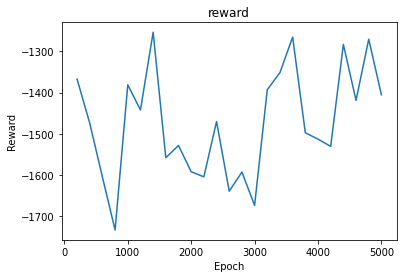

-1473.6172534311177


In [ ]:
plt.plot(hist1.history['nb_steps'],hist1.history['episode_reward'])
plt.title('reward')
plt.ylabel('Reward')
plt.xlabel('Epoch')
plt.show()
print(np.mean(hist1.history['episode_reward']))

In [ ]:
scores = agent.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: -1306.142, steps: 200
Episode 2: reward: -1498.062, steps: 200
Episode 3: reward: -1491.581, steps: 200
Episode 4: reward: -1410.481, steps: 200
Episode 5: reward: -1256.518, steps: 200
Episode 6: reward: -1498.966, steps: 200
Episode 7: reward: -1493.282, steps: 200
Episode 8: reward: -1344.316, steps: 200
Episode 9: reward: -1363.745, steps: 200
Episode 10: reward: -1349.782, steps: 200
Episode 11: reward: -1497.642, steps: 200
Episode 12: reward: -1501.434, steps: 200
Episode 13: reward: -1396.844, steps: 200
Episode 14: reward: -1408.487, steps: 200
Episode 15: reward: -1154.005, steps: 200
Episode 16: reward: -1492.522, steps: 200
Episode 17: reward: -1493.056, steps: 200
Episode 18: reward: -1371.628, steps: 200
Episode 19: reward: -1493.188, steps: 200
Episode 20: reward: -1401.479, steps: 200
Episode 21: reward: -1492.420, steps: 200
Episode 22: reward: -1491.159, steps: 200
Episode 23: reward: -1394.826, steps: 200
Episode 24: re

In [ ]:
p=agent.test(env, nb_episodes=1, visualize=False)

Testing for 1 episodes ...
Episode 1: reward: -1320.473, steps: 200


In [ ]:
p.history.keys()

dict_keys(['episode_reward', 'nb_steps'])

In [ ]:
# del dqn
# dqn = build_agent(model, actions)
# dqn.compile(Adam(learning_rate=1e-2), metrics=['mae'])
# history=dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

agent.compile(Adam(lr=0.001, clipnorm=1.), metrics=['mae'])

history = agent.fit(env, nb_steps= 5000, visualize= False, verbose=1, nb_max_episode_steps=200)

Adam
Training for 5000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


 5000/10000 [==============>...............] - ETA: 1:09 - reward: -5.6720done, took 70.931 seconds


In [ ]:
print(history.history.keys())
hist2=history

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


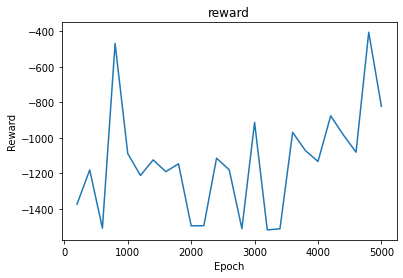

-1134.40246879173


In [ ]:
# plt.plot(hist2.history['nb_steps'][0:100],hist2.history['episode_reward'][0:100])
plt.plot(hist2.history['nb_steps'],hist2.history['episode_reward'])
# plt.plot(hist.history[])
plt.title('reward')
plt.ylabel('Reward')
plt.xlabel('Epoch')
plt.show()
print(np.mean(hist2.history['episode_reward']))

In [ ]:
# del dqn
# dqn = build_agent(model, actions)
# dqn
# dqn.compile(SGD(learning_rate=1e-2), metrics=['mae'])
# history=dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

agent.compile(SGD(lr=0.001, clipnorm=1.), metrics=['mae'])

history = agent.fit(env, nb_steps= 5000, visualize= False, verbose=1, nb_max_episode_steps=200)

SGD
Training for 5000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


 5000/10000 [==============>...............] - ETA: 1:08 - reward: -4.5132done, took 69.912 seconds


In [ ]:
print(history.history.keys())
hist3=history

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


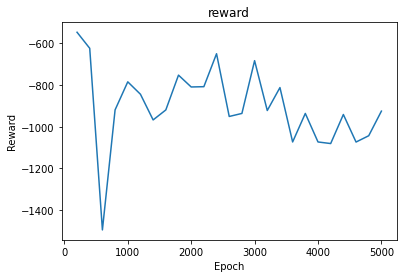

-902.646218397084


In [ ]:
plt.plot(hist3.history['nb_steps'],hist3.history['episode_reward'])
# plt.plot(hist.history[])
plt.title('reward')
plt.ylabel('Reward')
plt.xlabel('Epoch')
plt.show()
print(np.mean(hist3.history['episode_reward']))

In [ ]:
# del dqn
# dqn = build_agent(model, actions)
# dqn.compile(Adamax(learning_rate=1e-2), metrics=['mae'])
# history=dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

agent.compile(Adamax(learning_rate=1e-2), metrics=['mae'])

history = agent.fit(env, nb_steps= 5000, visualize= False, verbose=1, nb_max_episode_steps=200)

Adamax
Training for 5000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


 4998/10000 [=============>................] - ETA: 1:09 - reward: -3.1288done, took 70.594 seconds


In [ ]:
print(history.history.keys())
hist4=history

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


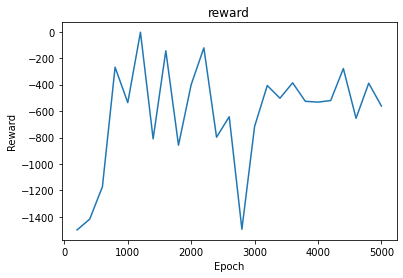

-625.5226704713133


In [ ]:
plt.plot(hist4.history['nb_steps'],hist4.history['episode_reward'])
# plt.plot(hist.history[])
plt.title('reward')
plt.ylabel('Reward')
plt.xlabel('Epoch')
plt.show()
print(np.mean(hist4.history['episode_reward']))

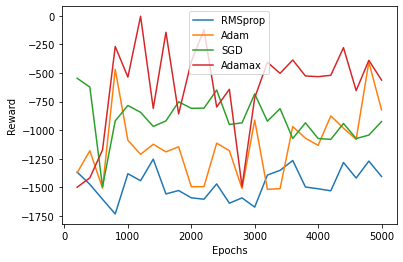

In [ ]:
plt.figure()
plt.plot(hist1.history['nb_steps'],hist1.history['episode_reward'], label='RMSprop')
plt.plot(hist2.history['nb_steps'],hist2.history['episode_reward'],label='Adam')
plt.plot(hist3.history['nb_steps'],hist3.history['episode_reward'],label='SGD')
plt.plot(hist4.history['nb_steps'],hist4.history['episode_reward'],label='Adamax')
#plt.plot(train_loss5, color='navy', alpha=0.8, label='Adadelta')
#plt.title("Network Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Reward")
plt.legend()
plt.show()